# Customer Segmentation

In [84]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
import string
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score,confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


#Loading the data

In [41]:
data = pd.read_excel("data.xlsx")
data.head()

,Merchant Id,Annual Revenue (k$),Spending Score (1-100),City,Most Purchased Product,Repayment Score 1-5
0,1,15,39,Mtwara,Mtindi 500ml,1
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2
2,3,16,6,Mtwara,Mtindi 500ml,3
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4
4,5,17,40,Mtwara,Mtindi 500ml,2


In [42]:
data.shape

(200, 6)

In [43]:
data.rename(columns={'Annual Revenue (k$)':'Annual_Revenue',
                   'Spending Score (1-100)':'Spending_Score',
                   'Most Purchased Product': 'Most_Purchased_Product',
                     'Repayment Score 1-5' : "Repayment_Score"
                  },
                   inplace=True
          )

In [44]:
data.describe()

,Merchant Id,Annual_Revenue,Spending_Score,Repayment_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000,3.990000
std,57.879185,26.264721,25.823522,0.850598
min,1.000000,15.000000,1.000000,1.000000
25%,50.750000,41.500000,34.750000,4.000000
50%,100.500000,61.500000,50.000000,4.000000
75%,150.250000,78.000000,73.000000,5.000000
max,200.000000,137.000000,99.000000,5.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
 5   Repayment_Score         200 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [46]:
data.isnull().sum()

Merchant Id               0
Annual_Revenue            0
Spending_Score            0
City                      0
Most_Purchased_Product    0
Repayment_Score           0
dtype: int64

In [47]:
data['City'].value_counts()

Dar es Salaam    82
Moshi            76
Mtwara           21
Zanzibar City    21
Name: City, dtype: int64

In [48]:
data['Most_Purchased_Product'].value_counts()

Mtindi 250ml        82
Fresh Milk 1ltr     76
Mtindi 500ml        21
Fresh Milk 250ml    21
Name: Most_Purchased_Product, dtype: int64

In [49]:
data.duplicated().sum()

0

In [50]:
data.corr()

C:\Users\This pc\AppData\Local\Temp\ipykernel_9624\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Merchant Id,Annual_Revenue,Spending_Score,Repayment_Score
Merchant Id,1.000000,0.977548,0.013835,0.030009
Annual_Revenue,0.977548,1.000000,0.009903,0.060309
Spending_Score,0.013835,0.009903,1.000000,-0.006543
Repayment_Score,0.030009,0.060309,-0.006543,1.000000


C:\Users\This pc\AppData\Local\Temp\ipykernel_9624\44562976.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x] , bins = 20)
C:\Users\This pc\AppData\Local\Temp\ipykernel_9624\44562976.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x] , bins = 20)
C:\Users\This pc\AppData\Local

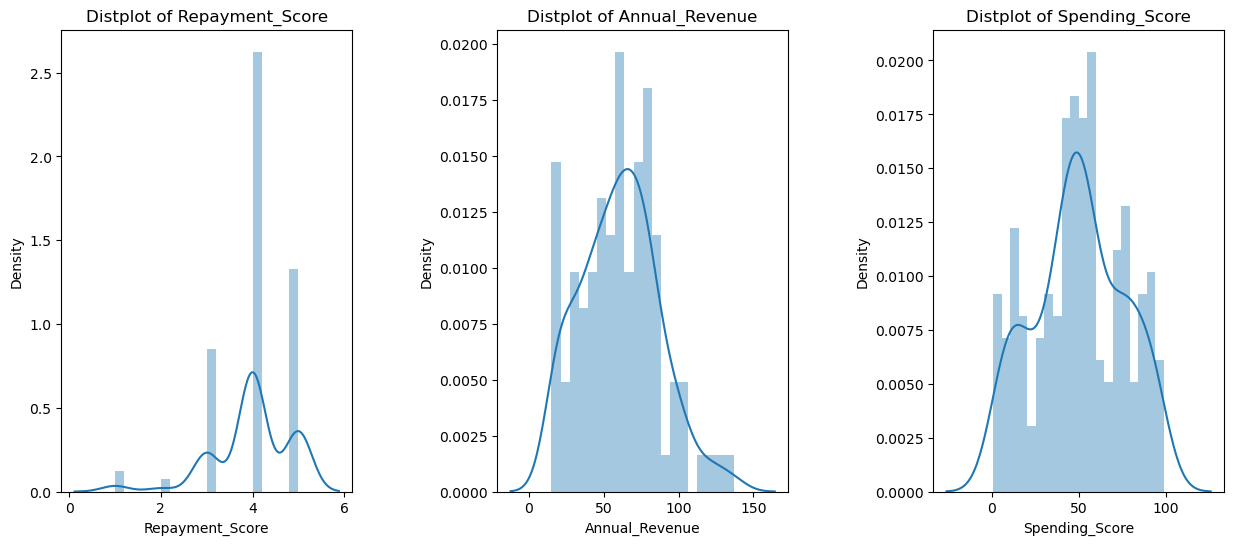

In [51]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ["Repayment_Score", 'Annual_Revenue' , 'Spending_Score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


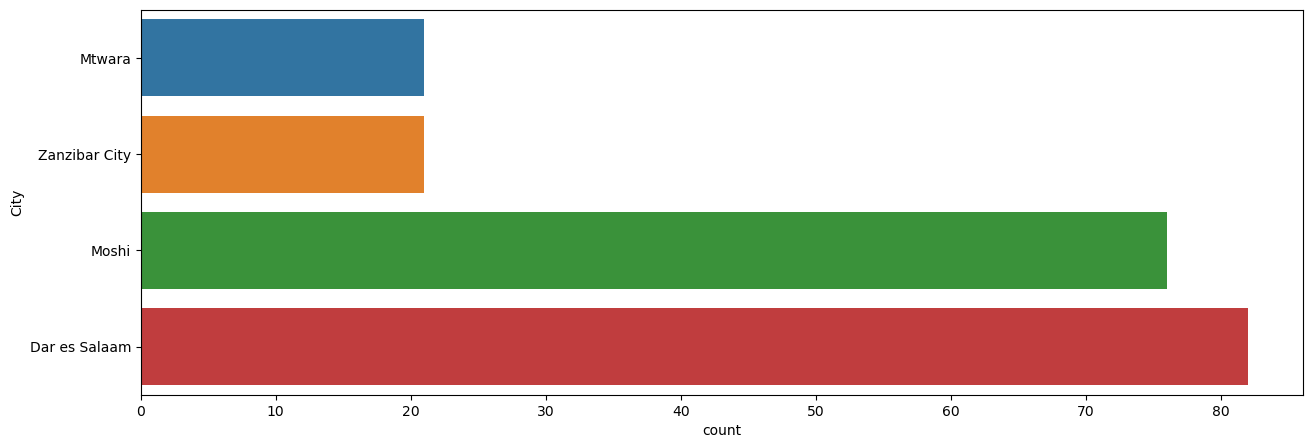

In [52]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'City' , data = data)
plt.show()

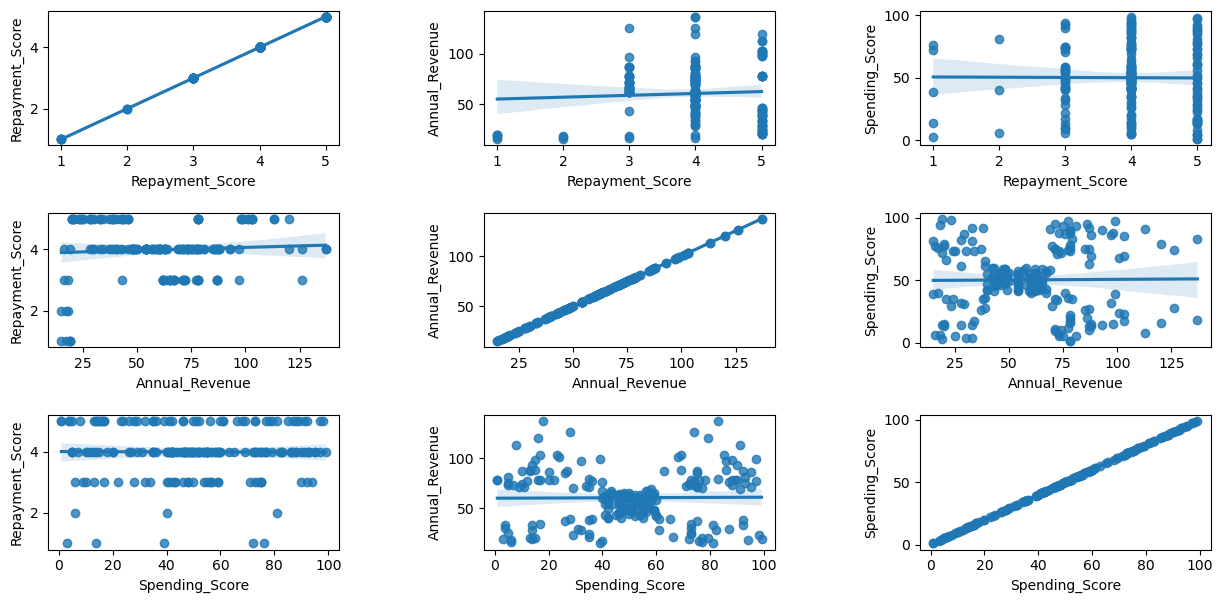

In [53]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Repayment_Score' , 'Annual_Revenue' , 'Spending_Score']:
    for y in ['Repayment_Score' , 'Annual_Revenue' , 'Spending_Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

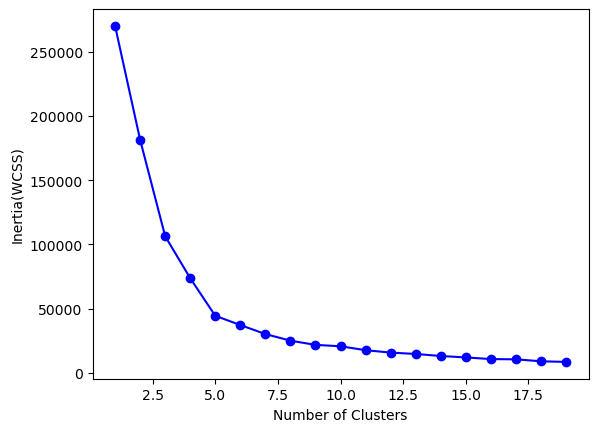

In [54]:
from sklearn.cluster import KMeans
#Creating values for the elbow
X = data.loc[:,["Annual_Revenue", "Spending_Score"]].values
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

#Plotting the elbow
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia(WCSS)')
plt.show()


In [55]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
labels = means_k.labels_
centroids = kmeans.cluster_centers_
print(y_kmeans)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [56]:
print(centroids)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


In [57]:
len(y_kmeans)

200

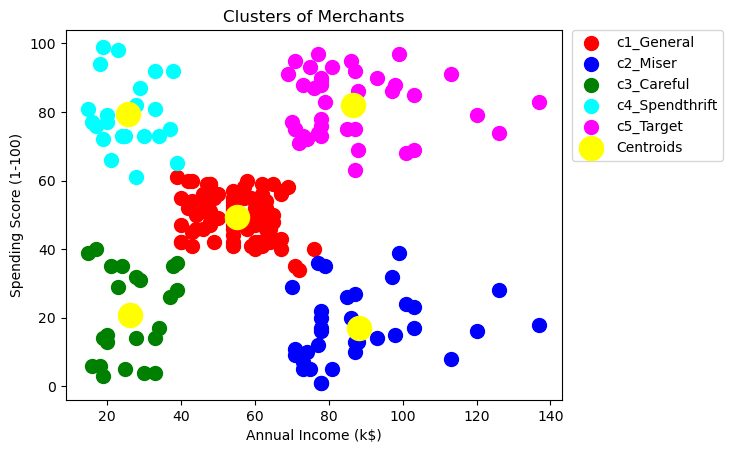

In [58]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'c1_General')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'c2_Miser')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'c3_Careful')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'c4_Spendthrift')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'c5_Target')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Merchants')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
# plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [59]:
data

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment_Score
0,1,15,39,Mtwara,Mtindi 500ml,1
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2
2,3,16,6,Mtwara,Mtindi 500ml,3
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4
4,5,17,40,Mtwara,Mtindi 500ml,2
...,...,...,...,...,...,...
195,196,120,79,Dar es Salaam,Mtindi 250ml,4
196,197,126,28,Dar es Salaam,Mtindi 250ml,3
197,198,126,74,Dar es Salaam,Mtindi 250ml,4
198,199,137,18,Dar es Salaam,Mtindi 250ml,4


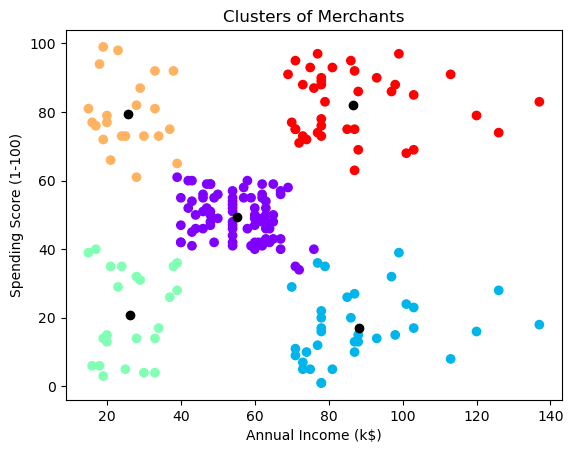

In [60]:
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Merchants')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [61]:
data.loc[:,"Cluster_Number"] = y_kmeans

C:\Users\This pc\AppData\Local\Temp\ipykernel_9624\3916738982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


<Axes: >

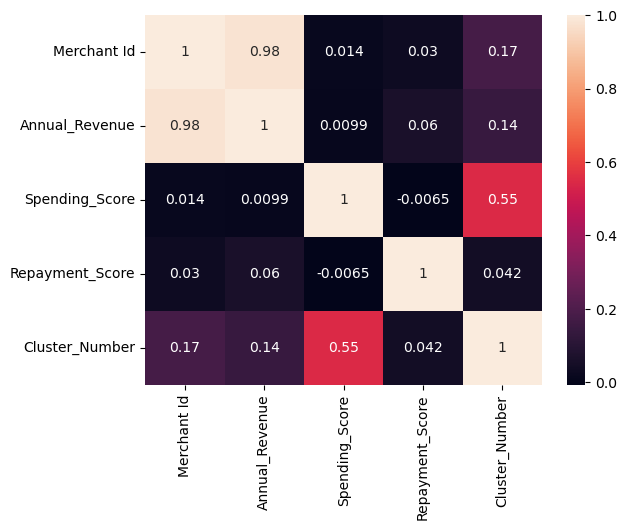

In [62]:
sns.heatmap(data.corr(),annot = True)

In [63]:
Cluster_Nature = []

for row in data['Cluster_Number']:
    if row == 0: 
        Cluster_Nature.append('General')
    elif row == 1: 
        Cluster_Nature.append('Miser') # Miser is the one who hoards wealth and spends a little money
    elif row == 2: Cluster_Nature.append('Careful')
    elif row == 3: Cluster_Nature.append('Spendthrift') # spendthrift is the one who spends money in an extravagant
    elif row == 4:  Cluster_Nature.append('Target')
    else: Cluster_Nature.append('Outlier')

data['Cluster_Nature'] = Cluster_Nature

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
 5   Repayment_Score         200 non-null    int64 
 6   Cluster_Number          200 non-null    int32 
 7   Cluster_Nature          200 non-null    object
dtypes: int32(1), int64(4), object(3)
memory usage: 11.8+ KB


In [65]:
data.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment_Score,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,1,2,Careful
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,3,Spendthrift
2,3,16,6,Mtwara,Mtindi 500ml,3,2,Careful
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4,3,Spendthrift
4,5,17,40,Mtwara,Mtindi 500ml,2,2,Careful


In [66]:
data['Cluster_Nature'].value_counts()

General        81
Target         39
Miser          35
Careful        23
Spendthrift    22
Name: Cluster_Nature, dtype: int64

In [67]:
uniqueValues = data['Cluster_Nature'].unique()
print(uniqueValues)

['Careful' 'Spendthrift' 'General' 'Target' 'Miser']


In [68]:
target_data = data.loc[data['Cluster_Nature'] == 'Target']

In [69]:
target_data.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment_Score,Cluster_Number,Cluster_Nature
123,124,69,91,Dar es Salaam,Mtindi 250ml,4,4,Target
125,126,70,77,Dar es Salaam,Mtindi 250ml,4,4,Target
127,128,71,95,Dar es Salaam,Mtindi 250ml,4,4,Target
129,130,71,75,Dar es Salaam,Mtindi 250ml,3,4,Target
131,132,71,75,Dar es Salaam,Mtindi 250ml,3,4,Target


C:\Users\This pc\AppData\Local\Temp\ipykernel_9624\1316919392.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['City']).sum().plot(


<Axes: >

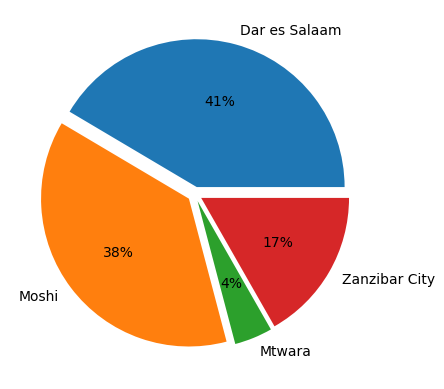

In [70]:
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05,0.05)
  
# Plotting the pie chart for above dataframe
data.groupby(['City']).sum().plot(
    kind='pie', y='Spending_Score', autopct='%1.0f%%', explode=explode, legend = False,ylabel='')

C:\Users\This pc\AppData\Local\Temp\ipykernel_9624\2827079310.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Most_Purchased_Product']).sum().plot(


<Axes: >

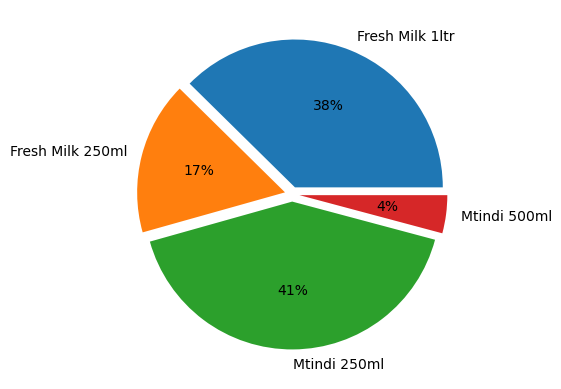

In [71]:
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05,0.05)
  
# Plotting the pie chart for above dataframe
data.groupby(['Most_Purchased_Product']).sum().plot(
    kind='pie', y='Spending_Score', autopct='%1.0f%%', explode=explode, legend = False, ylabel='')

Cluster_Nature  Careful  General  Miser  Spendthrift  Target
City                                                        
Dar es Salaam         0        8     35            0      39
Moshi                 2       73      0            1       0
Mtwara               21        0      0            0       0
Zanzibar City         0        0      0           21       0


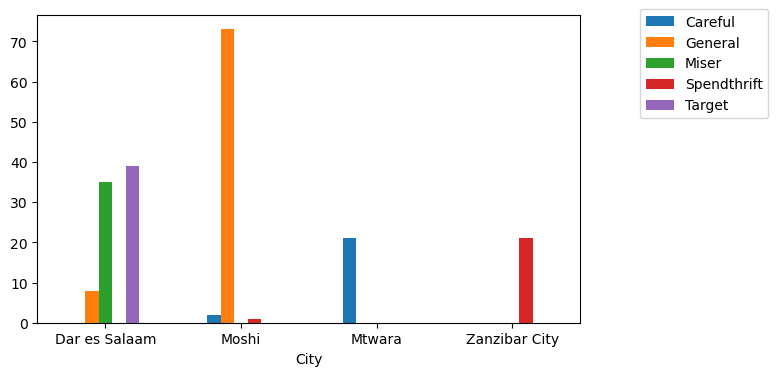

In [72]:
# Cross tabulation between City and Cluster  Nature
CrosstabResult=pd.crosstab(index=data['City'],columns=data['Cluster_Nature'])
print(CrosstabResult)
# Grouped bar chart 
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.legend(bbox_to_anchor=(1.36, 1.04))

Cluster_Nature          Careful  General  Miser  Spendthrift  Target
Most_Purchased_Product                                              
Fresh Milk 1ltr               2       73      0            1       0
Fresh Milk 250ml              0        0      0           21       0
Mtindi 250ml                  0        8     35            0      39
Mtindi 500ml                 21        0      0            0       0


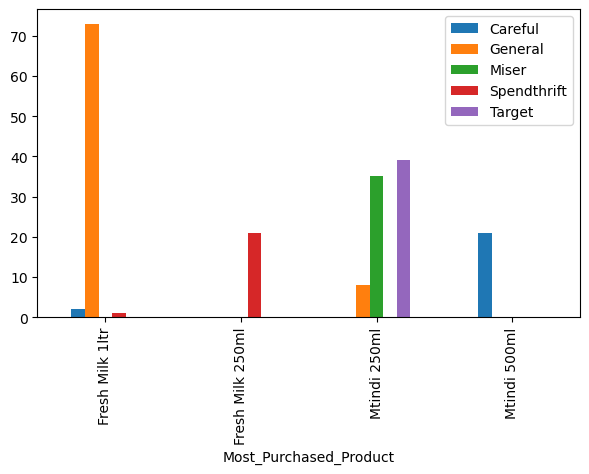

In [73]:
# Cross tabulation between Product and Cluster  Nature
CrosstabResult=pd.crosstab(index=data['Most_Purchased_Product'],columns=data['Cluster_Nature'])
print(CrosstabResult)
# Grouped bar chart 
CrosstabResult.plot.bar(figsize=(7,4))
plt.legend(bbox_to_anchor=(1.0, 1.0))

City                    Dar es Salaam  Moshi  Mtwara  Zanzibar City
Most_Purchased_Product                                             
Fresh Milk 1ltr                     0     76       0              0
Fresh Milk 250ml                    0      0       0             21
Mtindi 250ml                       82      0       0              0
Mtindi 500ml                        0      0      21              0


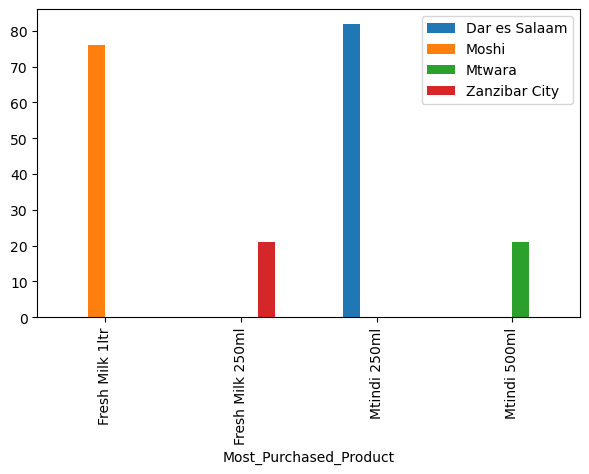

In [74]:
# Cross tabulation between Product and Cluster  Nature
CrosstabResult=pd.crosstab(index=data['Most_Purchased_Product'],columns=data['City'])
print(CrosstabResult)
# Grouped bar chart 
CrosstabResult.plot.bar(figsize=(7,4))
plt.legend(bbox_to_anchor=(1.0, 1.0))

                              Annual_Revenue
City          Cluster_Nature                
Dar es Salaam General              69.500000
              Miser                88.200000
              Target               86.538462
Moshi         Careful              39.000000
              General              53.739726
              Spendthrift          39.000000
Mtwara        Careful              25.095238
Zanzibar City Spendthrift          25.095238


<Axes: xlabel='City,Cluster_Nature'>

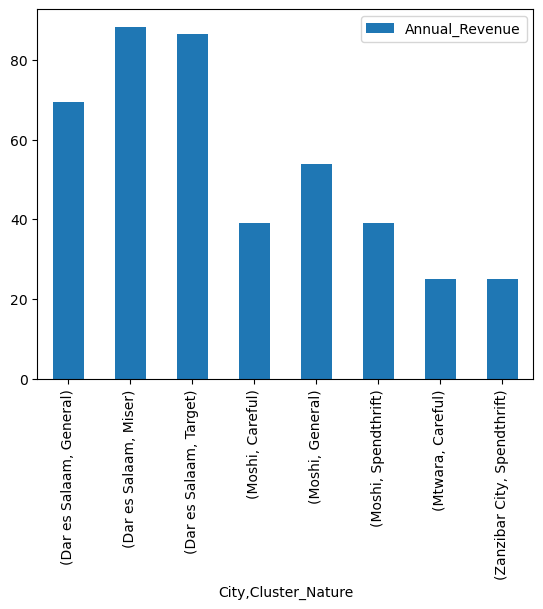

In [75]:
#Pivoit Table on city vs Cluster Nature aggregated by Annual Revenue
table = pd.pivot_table(data,index=['City','Cluster_Nature'],aggfunc={'Annual_Revenue':np.mean}) #,'Most_Purchased_Product':np.sum
print(table)
table.plot(kind='bar')

In [77]:
data_encoded = pd.get_dummies(data, columns=['City', 'Most_Purchased_Product', 'Cluster_Nature'])
y = data_encoded['Repayment_Score']
X = data_encoded.drop(['Merchant Id', 'Repayment_Score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}


In [85]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

     

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [86]:
best_rf = grid_search.best_estimator_

In [87]:
# Make predictions on the test set
y_pred = best_rf.predict(X_test_scaled)


In [88]:
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

Random Forest Classifier Accuracy: 0.725


In [89]:

# Feature importance analysis
feature_importances = best_rf.feature_importances_
     

In [91]:
data.to_csv('analyzed.csv', index=False)

In [93]:
data.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment_Score,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,1,2,Careful
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,3,Spendthrift
2,3,16,6,Mtwara,Mtindi 500ml,3,2,Careful
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4,3,Spendthrift
4,5,17,40,Mtwara,Mtindi 500ml,2,2,Careful


In [94]:
# Swap values between 'Cluster_Nature' and 'Cluster_Number'
data['Cluster_Nature'], data['Cluster_Number'] = data['Cluster_Number'], data['Cluster_Nature']


In [95]:
data.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment_Score,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,1,Careful,2
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,Spendthrift,3
2,3,16,6,Mtwara,Mtindi 500ml,3,Careful,2
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4,Spendthrift,3
4,5,17,40,Mtwara,Mtindi 500ml,2,Careful,2


In [97]:
data.to_csv('analyzed.csv', index=False)